In [22]:
from utils import collect, IMG_TAG, IMGC_TAG, IMGR_TAG

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


kd_folder = "/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/kd/"
base_folder = "/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/basemodels/"
sns.set_context("talk", font_scale=0.9)

In [23]:
df = collect(kd_folder)
df = df[df["Teacher"].notnull()]
df = df[df["Network"] == "resnet18"]
df["Method"] = df["Loss"]

df_base = collect(base_folder)
# Only use resnet18
df_base = df_base[df_base["Network"] == "resnet18"]
df_base["Method"] = "Baseline"
df_base["Teacher"] = "no teacher"

# Just use for loop
## err_deltas = {}

# for err_tag in [IMG_TAG, IMGC_TAG, IMGR_TAG]:
#     df[f"Baseline {err_tag}"] = df_base[df_base["Amda"] == True][err_tag].item() * df["Amda"] + df_base[df_base["Amda"] == False][err_tag].item() * (1 - df["Amda"])
#     df[f"Δ {err_tag}"] = df[f"Baseline {err_tag}"] - df[err_tag]
# df_base[df["Amda"] == True]df["Baseline"] = df_base[df_base["Amda"] == True][IMG_TAG] * df["Amda"] 

# df.loc[df["Amda"] == True]["Some"] = "Value"

df_comb = pd.concat([df, df_base])


In [24]:
df_comb = df_comb.query("Amda == False")

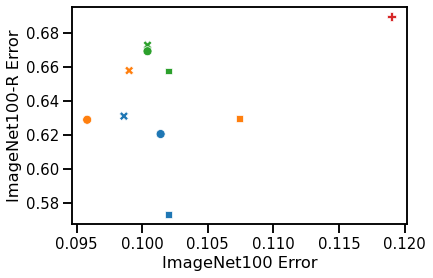

In [29]:
sns.scatterplot(data=df_comb, x=IMG_TAG, y=IMGR_TAG, hue="Method", style="Teacher")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend('', frameon=False)

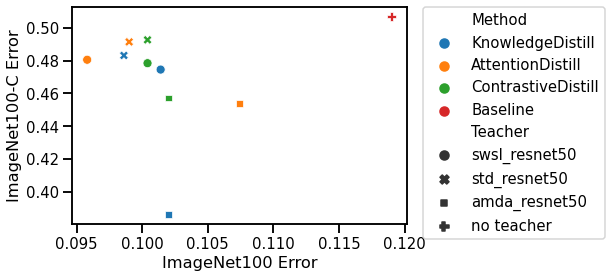

In [27]:
sns.scatterplot(data=df_comb, x=IMG_TAG, y=IMGC_TAG, hue="Method", style="Teacher")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

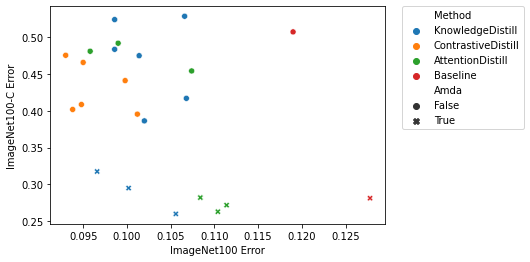

In [38]:
sns.scatterplot(data=df, x=IMG_TAG, y=IMGC_TAG, hue="Method", style="Amda")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

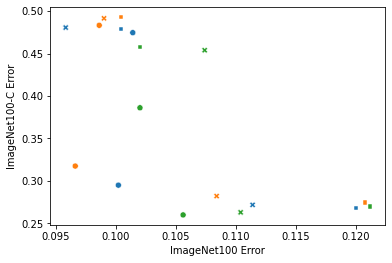

In [12]:
sns.scatterplot(data=df, x=IMG_TAG, y=IMGC_TAG, hue="Teacher", style="Method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend('', frameon=False)

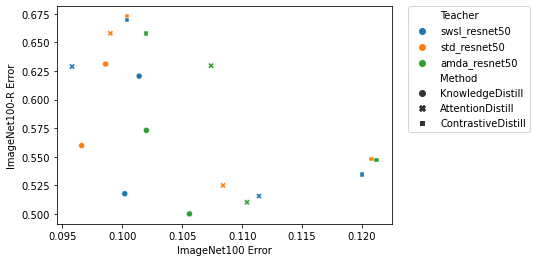

In [13]:
sns.scatterplot(data=df, x=IMG_TAG, y=IMGR_TAG, hue="Teacher", style="Method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)